In [1]:
import pennylane as qml
from pennylane import qaoa
from pennylane import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

In [2]:
# DEFINE GRAPH
edges = [(0, 1), (1, 2), (2, 0), (2, 3)]
graph = nx.Graph(edges)

# nx.draw(graph, with_labels=True)
# plt.show()

In [3]:
# HAMILTONIANS
cost_h, mixer_h = qaoa.min_vertex_cover(graph, constrained=False)

# print("Cost Hamiltonian", cost_h)
# print("Mixer Hamiltonian", mixer_h)

In [4]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [5]:
wires = range(4)
depth = 1

def circuit(params, **kwargs):
    for w in wires:
        qml.Hadamard(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

In [6]:
dev = qml.device("default.mixed", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

In [7]:
optimizer = qml.GradientDescentOptimizer()
steps = 100

In [14]:
qml._grad.grad(cost_function)

In [49]:
params = np.random.uniform(0, 2 * np.pi, size=(2,1))
for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)
print(cost_function(params))

Optimal Parameters
[[0.35295168]
 [5.88923658]]
-1.4098094900379745


/tmp/ipykernel_10403/4045427818.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


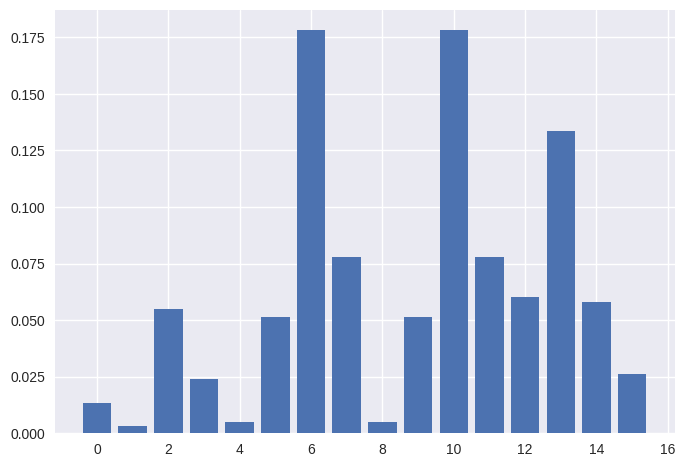

In [51]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

plt.style.use("seaborn")
plt.bar(range(2 ** len(wires)), probs)
plt.show()
